# <hr>Question 1: K-Means Clustering
<ol><li>Implement a function that performs K-means clustering by yourself from scratch.
<li>Load the Wisconsin Diagnostic Breast Cancer dataset (see the link below). You should obtain a data
matrix with D = 10 features and N = 699 samples. Attribute information in Table 1. (Please refer to
the data description on the webpage if there is anything updated or changed.)
<li>First without the class label, run your algorithm. Then compare with the class labels, what is the
accuracy of your algorithm?
<li>Run your algorithm several times, starting with different centers. Do your results change depending
on this? Explain.
<li>Can you get a better result using a supervised method? (You don’t need to implement the supervised
method from scratch. You can use a package or function provided by Python).


In [1]:
# Common imports
import pandas as pd
import numpy as np
import numpy.random as rnd
import random
import os

random.seed(1)
rnd.seed(1)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 1.1 K-Means from scratch

In [2]:
def euclidean_dst(arr1,arr2):
    # same as: np.sqrt(np.sum(np.square(arr_1 - arr2)))
    return np.linalg.norm(arr1 - arr2)

# return centroid to a point given two centroids 
def assign_to_centroid(point, c1, c2):
    
    dst_c1 = euclidean_dst(point, c1)
    dst_c2 = euclidean_dst(point, c2)
    
    if dst_c1<dst_c2:
        return c1
    else:
        return c2
    
# update the centroids for each point in dictionary    
def update_centroid(main, update=0):
    cds = main['cds']
    c1 = cds[0]
    c2 = cds[1]
    
    tempc1 = []
    tempc2 = []
    for i in range(len(main['points'])):
        point = main['points'][i]
        if np.array_equal(point['centroid'],c1):
            tempc1.append(point['value'])
        else:
            tempc2.append(point['value'])
    if not update:
        print('#Class 1: ', len(tempc1))
        print('#Class 2: ', len(tempc2))
        #print('^for previous iteration')
    if update:
        new_c1 = np.mean(tempc1, axis=0)
        new_c2 = np.mean(tempc2, axis=0)

        main['cds'] = [new_c1, new_c2]
        
# knn function        
def initialize(x_train, seed=1, max_iter=0):
    # intialize the centroids, create main dictionary and prepare the structure in which data will be stored
    random.seed(seed)
    print('_'*60)
    print('Random Seed: {}\nMax Iter: {}'.format(seed, max_iter))
    print('Train Shape: ', x_train.shape)
    temp_list = list(range(0,x_train.shape[0]))
    centroids = random.sample(temp_list, 3)
    
    main['cds']=[x_train[centroids[0]], x_train[centroids[1]]]
    print('Centroids: {}, {}'.format(main['cds'][0],main['cds'][1]))
    print('_'*60)
    for i in range(x_train.shape[0]):
        main['points'].append({'value':x_train[i],'centroid':None})
        
    #print(main)
    
    # for max_iter
    count=0
    # store old centroid to check later if new and old centroids are same
    old_centroid = np.array(main['cds'])
    
    #while count<max_iter:
    while count<max_iter:
        # if new_centroid==old_centroid:
        #     break
        print('Iteration: ',count)
        # except first iteration, store old and new centroids for further check
        if count!=0:
            old_centroids = main['cds']
            update_centroid(main, update=1)
            new_centroids = main['cds']
            
        print('Centroids: ',main['cds'])
            
        # iterate over all points in the dictionary, and save the assigned centroid for their individual dictionary
        for i in range(len(main['points'])):
            new_centroid = assign_to_centroid(main['points'][i]['value'], main['cds'][0], main['cds'][1])
            main['points'][i]['centroid']=new_centroid
        update_centroid(main)
        
        # except first iteration, compare the old and new centroids
        if count!=0:
            comparison = old_centroids == new_centroid
            if np.array(comparison[0]).all():
                print('\n| Clusters are same |\n')
                return
        print()
        count+=1

# print accuracy given the main dictionary and labels for training set
def print_acc(main, ytr):
    c = main['cds']
    mappings = {str(c[0]):2, str(c[1]):4}
    
    y_pred=[]
    for i in range(len(main['points'])):
        point = main['points'][i]
        c = str(point['centroid'])
        #print(type(c))
        y_pred.append(mappings[c])
    
    y_tr=list(ytr)
    if len(y_tr)==len(y_pred):
        correct=0
        for i in range(len(y_pred)):
            if y_pred[i] == y_tr[i]: 
                correct+=1
    acc = correct/len(y_tr)
    print('Correctly predicted: {}/{}'.format(correct,len(y_tr)))
    print('Accuracy is: {:.2f}'.format(acc))

# print test accuracy
def test_acc(xts,yts):
    xts_arr = xts.to_numpy()
    xts_arr.shape
    test = dict(points=[])
    test['cds'] = main['cds']

    for i in range(xts_arr.shape[0]):
        test['points'].append({'value':xts_arr[i],'centroid':None})
        test['points'][i]['centroid']=assign_to_centroid(test['points'][i]['value'], main['cds'][0], main['cds'][1])

    print_acc(test,yts)

## 1.2 Load and pre-process data

### <i>Importing the dataset and some EDA

In [3]:
data = pd.read_csv('breast-cancer-wisconsin.data', names=list(range(0,10)))
data['id'] = data.index
data.reset_index(inplace=True, drop=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,id
0,5,1,1,1,2,1,3,1,1,2,1000025
1,5,4,4,5,7,10,3,2,1,2,1002945
2,3,1,1,1,2,2,3,1,1,2,1015425
3,6,8,8,1,3,4,3,7,1,2,1016277
4,4,1,1,3,2,1,3,1,1,2,1017023


In [4]:
data.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,id
count,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000,6.990000e+02
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN,NaN
mean,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557,1.071704e+06
std,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273,6.170957e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000,6.163400e+04
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000,8.706885e+05
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000,1.171710e+06
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000,1.238298e+06


In [5]:
# cols = data.columns
# for c in cols:
#     print('-'*10+str(c)+'-'*10)
#     print(data[c].value_counts())

### <i>Removing rows with column 5 value as '?'

In [6]:
print('rows including (?): ',data.shape)
data = data[data[5]!='?']
print('rows removing (?): ',data.shape)

rows including (?):  (699, 11)
rows removing (?):  (683, 11)


### <i>Changing type of column 5 to int from object and some more EDA

In [7]:
df = data.copy()
df[5] = df[5].astype(int)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,id
0,5,1,1,1,2,1,3,1,1,2,1000025
1,5,4,4,5,7,10,3,2,1,2,1002945


In [8]:
#univ_analysis(df)

In [9]:
y = df[9]
x = df.drop(columns=['id', 9], axis=1)
print('x: ',x.shape)
print('y: ',y.shape)

x:  (683, 9)
y:  (683,)


In [10]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.2,stratify=y, random_state=1)
print('X Train: ', xtr.shape)
print('Y Train: ', ytr.shape)
print('X Test: ', xts.shape)
print('Y Test: ', yts.shape)

X Train:  (546, 9)
Y Train:  (546,)
X Test:  (137, 9)
Y Test:  (137,)


In [11]:
xtr_arr = xtr.to_numpy()
xtr_arr.shape

(546, 9)

In [12]:
xtr_arr[0:2]

array([[10,  6,  3,  6,  4, 10,  7,  8,  4],
       [ 1,  1,  1,  2,  1,  1,  1,  1,  1]])

In [13]:
ytr_arr = ytr.to_numpy()
xts_arr = xts.to_numpy()
yts_arr = yts.to_numpy()

### <hr>1.3 Running algorithm with different centers using different random states

In [14]:
for i in [0,10,123,321]:
    main = dict(cds='', points=[])
    initialize(xtr_arr, seed=i, max_iter=10)
    print('Train, Test Accuracies:')
    print_acc(main, ytr)
    print('-'*30)
    test_acc(xts,yts)

____________________________________________________________
Random Seed: 0
Max Iter: 10
Train Shape:  (546, 9)
Centroids: [5 1 3 1 2 1 2 1 1], [1 1 1 1 2 1 1 1 1]
____________________________________________________________
Iteration:  0
Centroids:  [array([5, 1, 3, 1, 2, 1, 2, 1, 1]), array([1, 1, 1, 1, 2, 1, 1, 1, 1])]
#Class 1:  345
#Class 2:  201

Iteration:  1
Centroids:  [array([6.09565217, 4.35072464, 4.40869565, 3.8       , 3.97101449,
       4.83478261, 4.34492754, 3.86086957, 1.7826087 ]), array([1.78109453, 1.13432836, 1.16915423, 1.23383085, 2.01492537,
       1.30348259, 2.00995025, 1.09950249, 1.05472637])]
#Class 1:  203
#Class 2:  343

Iteration:  2
Centroids:  [array([7.16256158, 6.4729064 , 6.4137931 , 5.5320197 , 5.31527094,
       7.408867  , 5.92118227, 5.75862069, 2.31034483]), array([2.93586006, 1.20991254, 1.32361516, 1.27113703, 2.02915452,
       1.24198251, 2.04373178, 1.11953353, 1.04373178])]
#Class 1:  187
#Class 2:  359

Iteration:  3
Centroids:  [array(

<b><i><li>As we can see from the above accuracies, changing the initial values of centroid, accuracy changes. For random state 0 and 123 we get accuracy 4% and for randomly initializing centroids based on seed= 10, 321 accuracy is 0.96<li>But what I noticed is, while using unsupervised learning method, we can get clusters with completely reversed class names hence this will result in giving accuracy of 96% and 100-96=4%  <hr>

### 1.5 Trying out Supervised Classification method - KNN

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]}


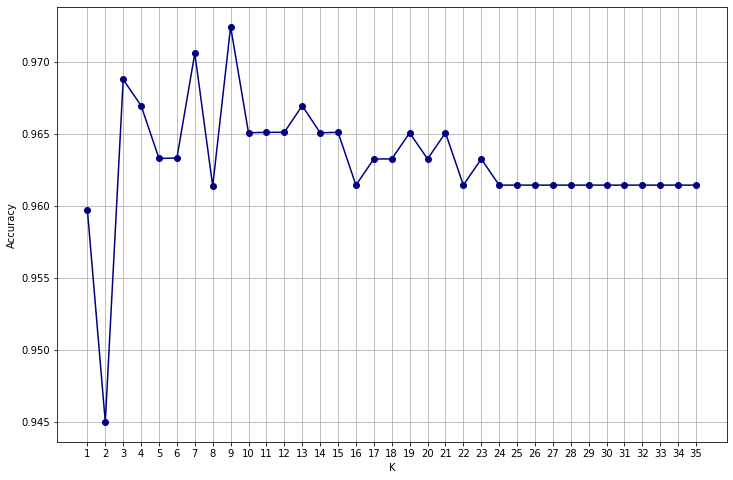

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# param gird generation for values of k
nn_range = list(range(1, 36))
param_grid = dict(n_neighbors=nn_range)
print(param_grid)

# grid search with cv

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(xtr, ytr)

# plot to visualize how accuracy changes as we change value of nearest neighbours
fix, ax = plt.subplots(figsize=(12,8))
plt.plot(nn_range, grid.cv_results_['mean_test_score'], color='navy', marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
ax.xaxis.set_ticks(np.arange(1,36,1))
plt.show()

<b><i>Yes, we get better accuracy while using supervised method(KNN). KNN gives cross validation accuracy of 98% when k=9
while what we were getting for KMeans(unsupervised) was maximum 96%
<hr>


### Q2)
• Implement the FLD for high-dimension to low-dimension projection with multivariant Gaussian. (Here Implement the FLD for high-dimension to low-dimension projection with multivariant Gaussian. 
• Split the MNIST dataset into training and testing. And report the accuracy on test set with D = 2 and D′ = 3.

• Make two plots for your testing data with a 2D and 3D plots. You can use different colors on the data
points to indicate different classes. See if your results make sense to you or not.

In [22]:
import numpy as np


In [30]:
# Generating the data
import tensorflow as tf
from sklearn.model_selection import train_test_split


mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#--------------------------------------flatten the train data
xtr_flat = []
for i in x_train:
    
    xtr_flat.append(i.flatten().tolist())
ytr_flat = y_train.tolist()
print("The size of train data:",  len(xtr_flat))
#------------------------------------------flatten the test data
xtest_flat = []
for i in x_test:
    
    xtest_flat.append(i.flatten().tolist())
ytest_flat = y_test.tolist()
print("The size of test data:",  len(xtest_flat))





The size of train data: 60000
The size of test data: 10000


## Visualizing the dataset



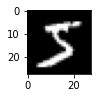

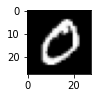

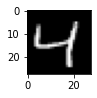

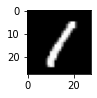

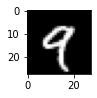

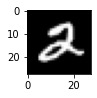

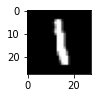

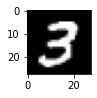

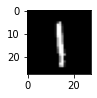

In [31]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

## Computation for D'=2

In [ ]:
proj_dim=2

In [32]:
# Gathering data points as per the class and aggregating into the dic
agg_dic = {}
for i in range(len(xtr_flat)):
    
    image_vec=xtr_flat[i]
    label=ytr_flat[i]

    if label not in agg_dic.keys():
        agg_dic[label]=[]
    agg_dic[label].append(image_vec)
    
# Sorting the aggregate dictionary on keys
sorted_agg_dic = sorted(agg_dic.items())
sort_agg_dic = dict(sorted_agg_dic)

In [33]:
#Count of the data points of each  classes
for key in sort_agg_dic.keys():
    print("The number of data points with label " + str(key) + " : "+  str(len(sort_agg_dic[key])))

The number of data points with label 0 : 5923
The number of data points with label 1 : 6742
The number of data points with label 2 : 5958
The number of data points with label 3 : 6131
The number of data points with label 4 : 5842
The number of data points with label 5 : 5421
The number of data points with label 6 : 5918
The number of data points with label 7 : 6265
The number of data points with label 8 : 5851
The number of data points with label 9 : 5949


In [34]:
# Mean values stored in this dictionary
mean={}
for x in sort_agg_dic.keys():
    
    mean[x]= np.mean(sort_agg_dic[x],axis=0)

sorted(mean)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
#Computing Sk
Sks = []
for mean_key, mean_value in mean.items():
    
    delta = np.subtract(sort_agg_dic[mean_key], mean_value)
    Sks.append(np.dot(np.transpose(delta), delta))

Sks = np.asarray(Sks)
Sw = np.sum(Sks, axis=0)


In [36]:
#Overall_m is the mean of the total flattened data set 
overall_m = np.sum(xtr_flat,axis=0)/ len(xtr_flat)
overall_m

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.23529412e-06, 3.07189542e-05, 1.41176471e-05, 5.88235294e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.04575163e-06, 3.59477124e-06, 3.64052288e-05, 9.52287582e-05,
       1.71437908e-04, 2.51372549e-04, 4.71111111e-04, 6.30326797e-04,
       6.83071895e-04, 6.95816993e-04, 7.42418301e-04, 6.82941176e-04,
       7.33071895e-04, 6.02549020e-04, 3.92614379e-04, 2.79346405e-04,
       2.11045752e-04, 8.37908497e-05, 3.95424837e-05, 1.38562092e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [37]:
# Calculate the difference between class mean and overall mean
from numpy.linalg import inv,pinv, eig
SB = []
for k,class_mean in mean.items():
    
    sub_ = class_mean - overall_m
    SB.append(np.multiply(len(sort_agg_dic[k]), np.outer(sub_, sub_.T)))
#SB
SB = np.sum(SB, axis=0)

In [38]:
#Perform dot product on Sw and SB
matrix = np.dot(pinv(Sw), SB)
print(matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
#Lets calculate eigen values and eigen vectors in order to get the weights
eig_val, eig_vec = eig(matrix)
print("The number of eigen values  :", eig_val.shape[0])
print("The shape of eigen vectors  :", eig_vec.shape)


The number of eigen values  : 784
The shape of eigen vectors  : (784, 784)


In [40]:
# Calculating the Eigen list
eig_l=[]
for i in range(len(eig_val)):
    eig_l.append((eig_val[i],eig_vec[:,i]))
eig_l = sorted(eig_l, key=lambda x: x[0], reverse=True)





In [41]:
# Calculating the weights 

Weights=[]
for i in range(proj_dim):
    Weights.append(eig_l[i][1])
Weights=np.array(Weights)
Weights = np.asarray(Weights).T


In [42]:
#Gaussian function is as follows
def gaussian(X, W):
    means = {}
    covariance = {}
    priors = {}  
    for class_id, values in X.items():
        proj = np.dot(values, W)
        #print(proj)
        means[class_id] = np.mean(proj, axis=0)
        covariance[class_id] = np.cov(proj, rowvar=False)
         
        priors[class_id] = len(values) / 60000
    return means, covariance, priors


def gaussian_distribution(x, u, cov):
    scalar = (1. / ((2 * np.pi) ** (x.shape[0] / 2.))) * (1 / np.sqrt(np.linalg.det(cov)))
    x_sub_u = np.subtract(x, u)
    return scalar * np.exp(-np.dot(np.dot(x_sub_u, inv(cov)), x_sub_u.T) / 2.)

In [43]:
gaus_means, gaus_covariance, priors = gaussian(sort_agg_dic,Weights)

In [45]:
print("The gaussian mean is as follows: ")
print()
print(gaus_means)

The gaussian mean is as follows: 

{0: array([-0.02676009+0.j, -0.02668783+0.j]), 1: array([0.0017983 +0.j, 0.04156634+0.j]), 2: array([-0.01136934+0.j,  0.01432411+0.j]), 3: array([-0.00504206+0.j,  0.01024315+0.j]), 4: array([ 0.01100066+0.j, -0.00961728+0.j]), 5: array([-0.00888454+0.j, -0.00245902+0.j]), 6: array([-0.02012079+0.j, -0.0034312 +0.j]), 7: array([ 0.02317453+0.j, -0.01440979+0.j]), 8: array([-0.00565978+0.j,  0.00960521+0.j]), 9: array([ 0.01788016+0.j, -0.01058523+0.j])}


In [46]:
# Calculating the metrics to check how the model is performing 

def metrics(xtr_flat,ytr_flat,Weights, gaus_means,priors,gaus_covariance):
    
    proj = np.dot(xtr_flat, Weights)
    likelihood=[]
    classes=sorted(list(gaus_means.keys()))

    for x in proj:
        row=[]
        for c in classes:  
            res = priors[c] * gaussian_distribution(x, gaus_means[c], gaus_covariance[c])  
            row.append(res)

        likelihood.append(row)
    likelihood = np.asarray(likelihood)

    predictions = np.argmax(likelihood, axis=1)
    acc=np.sum(predictions == ytr_flat) / len(ytr_flat)
    #print("The training accuracy is: " + str(np.sum(predictions == ytr_flat) / len(ytr_flat)))
    return acc, predictions, proj

acc,predictions,proj=metrics(xtr_flat,ytr_flat,Weights,gaus_means,priors,gaus_covariance)
print("The training accuracy is: ", acc)

               

The training accuracy is:  0.57645


Test accuracy is: 0.565


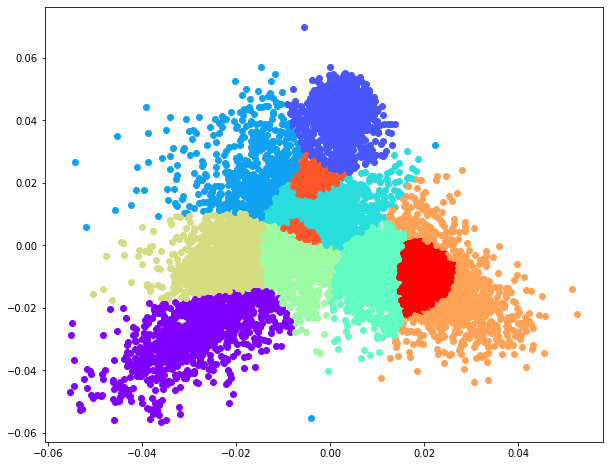

In [51]:
acc,predictions,proj= metrics(xtest_flat,ytest_flat, Weights, gaus_means,priors, gaus_covariance)
print("Test accuracy is:", acc)
#-----------------------------------Plots
import matplotlib.cm as cm
import matplotlib.pyplot as plt

classes = list(set(y_test))
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
plotlabels = {classes[c] : colors[c] for c in range(len(classes))}

plt.figure(figsize=(10,8))
for point,pred in zip(proj,predictions):
    plt.scatter(point[0],point[1],color=plotlabels[pred])
plt.show()
#plt.savefig(" D'=2.jpeg")

## Computation for D'=3

In [52]:
proj_dim=3


In [53]:
# Gathering data points as per the class and aggregating into the dic
agg_dic = {}
for i in range(len(xtr_flat)):
    
    image_vec=xtr_flat[i]
    label=ytr_flat[i]

    if label not in agg_dic.keys():
        agg_dic[label]=[]
    agg_dic[label].append(image_vec)
    
# Sorting the aggregate dictionary on keys
sorted_agg_dic = sorted(agg_dic.items())
sort_agg_dic = dict(sorted_agg_dic)
#Count of the data points of each  classes
for key in sort_agg_dic.keys():
    print("The number of data points with label " + str(key) + " : "+  str(len(sort_agg_dic[key])))


The number of data points with label 0 : 5923
The number of data points with label 1 : 6742
The number of data points with label 2 : 5958
The number of data points with label 3 : 6131
The number of data points with label 4 : 5842
The number of data points with label 5 : 5421
The number of data points with label 6 : 5918
The number of data points with label 7 : 6265
The number of data points with label 8 : 5851
The number of data points with label 9 : 5949


In [54]:
# Mean values stored in this dictionary
mean={}
for x in sort_agg_dic.keys():
    
    mean[x]= np.mean(sort_agg_dic[x],axis=0)

sorted(mean)
#Computing Sk
Sks = []
for mean_key, mean_value in mean.items():
    
    delta = np.subtract(sort_agg_dic[mean_key], mean_value)
    Sks.append(np.dot(np.transpose(delta), delta))

Sks = np.asarray(Sks)
Sw = np.sum(Sks, axis=0)
#Overall_m is the mean of the total flattened data set 
overall_m = np.sum(xtr_flat,axis=0)/ len(xtr_flat)
# Calculate the difference between class mean and overall mean
from numpy.linalg import inv,pinv, eig
SB = []
for k,class_mean in mean.items():
    
    sub_ = class_mean - overall_m
    SB.append(np.multiply(len(sort_agg_dic[k]), np.outer(sub_, sub_.T)))
#SB
SB = np.sum(SB, axis=0)

#Perform dot product on Sw and SB
matrix = np.dot(pinv(Sw), SB)
#print(matrix)

#Lets calculate eigen values and eigen vectors in order to get the weights
eig_val, eig_vec = eig(matrix)
print("The number of eigen values  :", eig_val.shape[0])
print("The shape of eigen vectors  :", eig_vec.shape)


The number of eigen values  : 784
The shape of eigen vectors  : (784, 784)


The training accuracy is:  0.7455166666666667
Test accuracy is: 0.7424


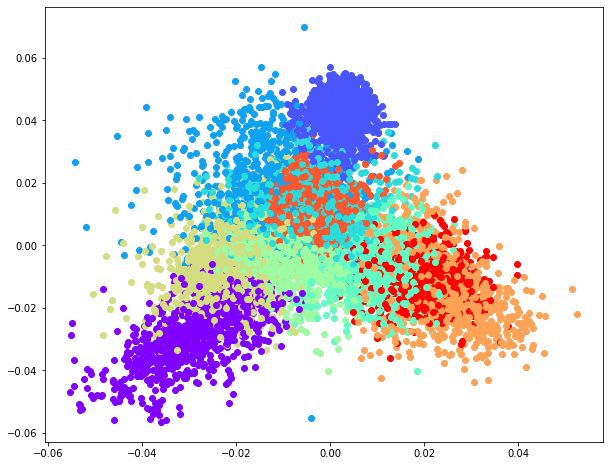

In [55]:
# Calculating the Eigen list
eig_l=[]
for i in range(len(eig_val)):
    eig_l.append((eig_val[i],eig_vec[:,i]))
eig_l = sorted(eig_l, key=lambda x: x[0], reverse=True)

# Calculating the weights 

Weights=[]
for i in range(proj_dim):
    Weights.append(eig_l[i][1])
Weights=np.array(Weights)
Weights = np.asarray(Weights).T

gaus_means, gaus_covariance, priors = gaussian(sort_agg_dic,Weights)

acc,predictions,proj=metrics(xtr_flat,ytr_flat,Weights,gaus_means,priors,gaus_covariance)
print("The training accuracy is: ", acc)

acc,predictions,proj= metrics(xtest_flat,ytest_flat, Weights, gaus_means,priors, gaus_covariance)
print("Test accuracy is:", acc)
#-----------------------------------Plots

import matplotlib.pyplot as plt
import matplotlib.cm as cm

classes = list(set(y_test))
colors = cm.rainbow(np.linspace(0, 1, len(classes)))
plotlabels = {classes[c] : colors[c] for c in range(len(classes))}

plt.figure(figsize=(10,8))
for point,pred in zip(proj,predictions):
    plt.scatter(point[0],point[1],color=plotlabels[pred])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:546: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:292: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


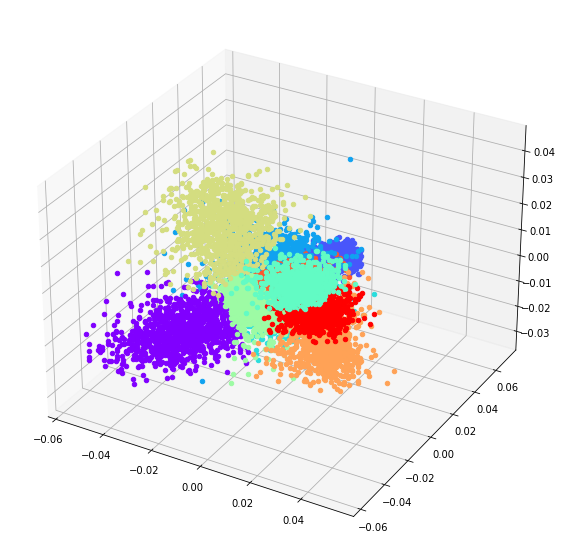

In [57]:
labels = list(set(ytest_flat))
col = cm.rainbow(np.linspace(0, 1, len(labels)))

#label_plot = {labels[k] : col[k] for k in range(len(labels))}
label_plot=dict()
for i in range(len(labels)):
  label_plot[labels[i]] = col[i]

fig = plt.figure(figsize=(12,10))
axes =fig.add_subplot(111,projection='3d')
axes.mouse_init()

for dp,pred in zip(proj,predictions):
    axes.scatter(dp[0],dp[1],dp[2],color=label_plot[pred])

plt.show()


## Conclusion



*   The training and test accuracy is almost the same in case whene D' = 2 
*   The training accuracy is:  57.6%
*   Test accuracy is: 56.5%


*   The training and test accuracy is almost the same in case whene D' = 3 
*   The training accuracy is:  74.5%
*   Test accuracy is: 74.2%



1.   The data points seems to be nicely segregated for multiclass classification.
2.   The accuracy of the model increases when the dimension D' increases i.e accuracy of D'=3 > D'=2 












In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.matlib import repmat 

In [13]:
# function = l2distance(X,Z)
# Here, X: dxn data matrix with n columns of dimensionality d, Z: dxm data matrix with m columns of dimensionality d

def l2distance(X, Z=None):    
    if Z is None:
        n, d = X.shape
        s1 = np.sum(np.power(X, 2), axis=1).reshape(-1,1)#reshape matrix as n*1
        D1 = -2 * np.dot(X, X.T) + repmat(s1, 1, n)#D1 -2X*X^T+X^2d*d
        D = D1 + repmat(s1.T, n, 1)#D1+(X^T)^2
        np.fill_diagonal(D, 0)
        D = np.sqrt(np.maximum(D, 0))#D=sqrt((x+x)^2)
    else:
        n, d = X.shape
        m, _ = Z.shape
        s1 = np.sum(np.power(X, 2), axis=1).reshape(-1,1)
        s2 = np.sum(np.power(Z, 2), axis=1).reshape(1,-1)
        D1 = -2 * np.dot(X, Z.T) + repmat(s1, 1, m)
        D = D1 + repmat(s2, n, 1)
        D = np.sqrt(np.maximum(D, 0))
    return D

# This function computes the Euclidean distance matrix.

In [14]:
# function = toydata(OFFSET,N)
# This function will generates binary data set with class 1 and 2 having distribution of standard Gaussian distribution.
def toydata(OFFSET,N):
    
    HALF_N = int(np.ceil(N/2))
    x = np.random.randn(N, 2)
    x[HALF_N:, :] += OFFSET  
    
    y = np.ones(N)
    y[HALF_N:] *= 2
    
    ab = np.random.permutation(N)
    return x[ab, :], y[ab]


In [15]:
#function = computeybar(xTemp, OFFSET)
def computeybar(xTemp, OFFSET):
    
    n,temp = xTemp.shape
    
    ybar = np.zeros(n)
    
    # The normal distribution has default parameter mu = 0 and sigma = 1.
    pdf = lambda x, mu, sigma: np.exp(-0.5 * np.power((x - mu) / sigma, 2)) / (np.sqrt(2 * np.pi) * sigma)
    
    pxy1 = pdf(xTemp,0,1)
    pxxy1 = pxy1[:,0]*pxy1[:,1]
    
    pxy2 = pdf(xTemp,OFFSET,1)
    pxxy2 = pxy2[:,0]*pxy2[:,1]
    
    pxx = pxxy1*0.5 + pxxy2*0.5
    
    
    py1xx = pxxy1*0.5/pxx
    py2xx = pxxy2*0.5/pxx
    
    ybar = py1xx+2*py2xx
    
    return ybar

#This function computes 'ybar' for data set generated from toydata in which one has mean  and other has mean 0 + OFFSET(in each dimension).
#Here, ybar is a (n x 1) vector of the expected label for xTemp.

85
Bayes classifier Error: 8.5%.


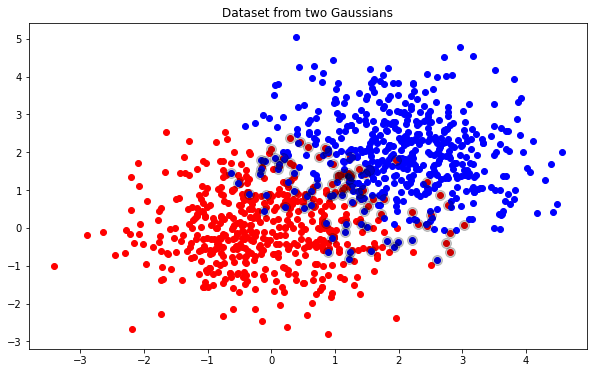

In [16]:
OFFSET = 2
xTemp, yTemp = toydata(OFFSET, 1000)

# compute Bayes Error
ybar = computeybar(xTemp, OFFSET)
predictions = np.round(ybar)
errors = predictions != yTemp
err = errors.sum() / len(yTemp) * 100
print(errors.sum())
print('Bayes classifier Error: %.1f%%.' % err)

# plot data
i1 = yTemp == 1
i2 = yTemp == 2
plt.figure(figsize=(10,6))
plt.scatter(xTemp[i1, 0], xTemp[i1, 1], c='r', marker='o')
plt.scatter(xTemp[i2, 0], xTemp[i2, 1], c='b', marker='o')
plt.scatter(xTemp[errors, 0], xTemp[errors, 1], c='k', s=100, alpha=0.2)
plt.title("Dataset from two Gaussians")
plt.show()

In [17]:
# function [kregression] (xTr(nx2matrix), yTr(nx1 matrix), sigma(width), lmbda(constant))
def kregression(xTr,yTr,sigma=0.1,lmbda=0.01):

    kernel = lambda x, z: np.power(1+(np.power(l2distance(x,z),2) / (2 * np.power(sigma,2))),-4)
    ridge = lambda K, lmbda2: K + lmbda * np.eye(K.shape[0], K.shape[1])
    beta = np.linalg.solve(ridge(kernel(xTr, xTr), lmbda), yTr)
    
    fun = lambda Xt: np.dot(kernel(Xt, xTr), beta)
    return fun

In [18]:
#function [hbar] = computehbar(xTemp(nx2 matrix), Sigma, lmbda(constant), Number_of_Sample, Num_OF_Models, Offset); 
def computehbar(xTemp, sigma, lmbda, sample, n_model, OFFSET):
    n = xTemp.shape[0]
    hbar = np.zeros(n)
    for j in range(n_model):
        xTr,yTr=toydata(OFFSET,sample)
        model=kregression(xTr,yTr,sigma,lmbda)
        hbar+=model(xTemp)    
    hbar /= n_model
    return hbar

#This function computes the expected prediction of the average classifier for data set.
# This function gives n x 1 vector with predictions of hbar for each input.

In [19]:
# function [variance] = computevariance(xTemp(nx2 matrix), sigma, lmbda, hbar(nx1 vector), sample, n_model, OFFSET)
def computevariance(xTemp, sigma, lmbda, hbar, sample, n_model, OFFSET):
    n = xTemp.shape[0]
    variance = np.zeros(n)
      
    for j in range(n_model):
        xTr,yTr=toydata(OFFSET,sample)
        model=kregression(xTr,yTr,sigma,lmbda)
        variance+=(model(xTemp)-hbar)**2    
    
    variance = np.mean(variance)/n_model
    return variance

# This function computes the variance of classifiers trained on data sets from toydata.m with particular "OFFSET" and with kernel regression, sigma and lmbda evaluated on xTemp. 

# Case - 1

In [20]:
# (D) Bias (biasvariancedemo)

sample = 10 # Training set N
n_big = 10000 # Big data set (Assume infinity)
n_model = 50 # models getting average over 25 times
lmbdas = np.arange(-6, 0+0.5, 0.5) ## regularization constants
sigma = 4 ## kernel width

Nlambdas = len(lmbdas)
lbias = np.zeros(Nlambdas)
lvariance = np.zeros(Nlambdas)
ltotal = np.zeros(Nlambdas)
lnoise = np.zeros(Nlambdas)
lsum = np.zeros(Nlambdas)

# Different regularization constant classifiers
for md in range(Nlambdas):
    lmbda = 2 ** lmbdas[md]
    xTemp,yTemp = toydata(OFFSET,n_big)
    
    # Average Error
    total = 0
    for j in range(n_model):
        xTr2,yTr2 = toydata(OFFSET,sample)
        fsmall = kregression(xTr2,yTr2,sigma,lmbda)
        total += np.mean((fsmall(xTemp) - yTemp) ** 2)
    total /= n_model
    
    # Noise
    ybar = computeybar(xTemp, OFFSET)
    noise = np.mean((yTemp - ybar) ** 2)
    
    # Bias
    hbar = computehbar(xTemp,sigma, lmbda, sample, n_model, OFFSET)
    bias = np.mean((hbar-ybar) ** 2)
    
    # Variance
    variance = computevariance(xTemp, sigma, lmbda, hbar, sample, n_model, OFFSET)
    
    # print and store results
    lbias[md] = bias
    lvariance[md] = variance
    ltotal[md] = total
    lnoise[md] = noise
    lsum[md] = lbias[md]+lvariance[md]+lnoise[md]
    print('Regularization λ=2^%2.1f: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (lmbdas[md],lbias[md],lvariance[md],lnoise[md],lsum[md],ltotal[md]))

Regularization λ=2^-6.0: Bias: 0.0206 Variance: 0.0628 Noise: 0.0586 Bias+Variance+Noise: 0.1421 Test error: 0.1557
Regularization λ=2^-5.5: Bias: 0.0322 Variance: 0.0729 Noise: 0.0585 Bias+Variance+Noise: 0.1635 Test error: 0.1817
Regularization λ=2^-5.0: Bias: 0.0313 Variance: 0.0629 Noise: 0.0586 Bias+Variance+Noise: 0.1528 Test error: 0.1626
Regularization λ=2^-4.5: Bias: 0.0355 Variance: 0.0670 Noise: 0.0578 Bias+Variance+Noise: 0.1603 Test error: 0.1492
Regularization λ=2^-4.0: Bias: 0.0401 Variance: 0.0496 Noise: 0.0580 Bias+Variance+Noise: 0.1477 Test error: 0.1559
Regularization λ=2^-3.5: Bias: 0.0447 Variance: 0.0441 Noise: 0.0533 Bias+Variance+Noise: 0.1421 Test error: 0.1422
Regularization λ=2^-3.0: Bias: 0.0438 Variance: 0.0444 Noise: 0.0597 Bias+Variance+Noise: 0.1479 Test error: 0.1368
Regularization λ=2^-2.5: Bias: 0.0483 Variance: 0.0342 Noise: 0.0595 Bias+Variance+Noise: 0.1419 Test error: 0.1384
Regularization λ=2^-2.0: Bias: 0.0589 Variance: 0.0291 Noise: 0.0555 Bia

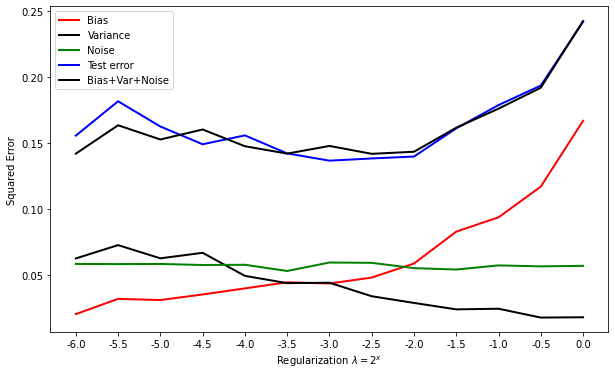

In [21]:
plt.figure(figsize=(10,6))
plt.plot(lbias[:Nlambdas],c='r',linewidth=2)
plt.plot(lvariance[:Nlambdas],c='k',linewidth=2)
plt.plot(lnoise[:Nlambdas],c='g',linewidth=2)
plt.plot(ltotal[:Nlambdas],c='b',linewidth=2)
plt.plot(lsum[:Nlambdas],c='k',linewidth=2)

plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"]);
plt.xlabel("Regularization $\lambda=2^x$");
plt.ylabel("Squared Error");
plt.xticks([i for i in range(Nlambdas)],lmbdas);

# Case - 2 

In [22]:
# (D) Bias (biasvariancedemo)

sample = 20 # Training set N
n_big = 50000 # Big data set (Assume infinity)
n_model = 100 # models getting average over 25 times
lmbdas = np.arange(-6, 0+0.5, 0.5) ## regularization constants
sigma = 4 ## kernel width

Nlambdas = len(lmbdas)
lbias = np.zeros(Nlambdas)
lvariance = np.zeros(Nlambdas)
ltotal = np.zeros(Nlambdas)
lnoise = np.zeros(Nlambdas)
lsum = np.zeros(Nlambdas)

# Different regularization constant classifiers
for md in range(Nlambdas):
    lmbda = 2 ** lmbdas[md]
    xTemp,yTemp = toydata(OFFSET,n_big)
    
    # Average Error
    total = 0
    for j in range(n_model):
        xTr2,yTr2 = toydata(OFFSET,sample)
        fsmall = kregression(xTr2,yTr2,sigma,lmbda)
        total += np.mean((fsmall(xTemp) - yTemp) ** 2)
    total /= n_model
    
    # Noise
    ybar = computeybar(xTemp, OFFSET)
    noise = np.mean((yTemp - ybar) ** 2)
    
    # Bias
    hbar = computehbar(xTemp,sigma, lmbda, sample, n_model, OFFSET)
    bias = np.mean((hbar-ybar) ** 2)
    
    # Variance
    variance = computevariance(xTemp, sigma, lmbda, hbar, sample, n_model, OFFSET)
    
    # print and store results
    lbias[md] = bias
    lvariance[md] = variance
    ltotal[md] = total
    lnoise[md] = noise
    lsum[md] = lbias[md]+lvariance[md]+lnoise[md]
    print('Regularization λ=2^%2.1f: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (lmbdas[md],lbias[md],lvariance[md],lnoise[md],lsum[md],ltotal[md]))

Regularization λ=2^-6.0: Bias: 0.0109 Variance: 0.0436 Noise: 0.0578 Bias+Variance+Noise: 0.1123 Test error: 0.1237
Regularization λ=2^-5.5: Bias: 0.0100 Variance: 0.0428 Noise: 0.0577 Bias+Variance+Noise: 0.1105 Test error: 0.1119
Regularization λ=2^-5.0: Bias: 0.0134 Variance: 0.0399 Noise: 0.0580 Bias+Variance+Noise: 0.1112 Test error: 0.1062
Regularization λ=2^-4.5: Bias: 0.0138 Variance: 0.0317 Noise: 0.0578 Bias+Variance+Noise: 0.1032 Test error: 0.1044
Regularization λ=2^-4.0: Bias: 0.0169 Variance: 0.0267 Noise: 0.0578 Bias+Variance+Noise: 0.1014 Test error: 0.1022
Regularization λ=2^-3.5: Bias: 0.0190 Variance: 0.0226 Noise: 0.0575 Bias+Variance+Noise: 0.0992 Test error: 0.0999
Regularization λ=2^-3.0: Bias: 0.0217 Variance: 0.0245 Noise: 0.0577 Bias+Variance+Noise: 0.1039 Test error: 0.1019
Regularization λ=2^-2.5: Bias: 0.0245 Variance: 0.0211 Noise: 0.0584 Bias+Variance+Noise: 0.1040 Test error: 0.1025
Regularization λ=2^-2.0: Bias: 0.0305 Variance: 0.0175 Noise: 0.0570 Bia

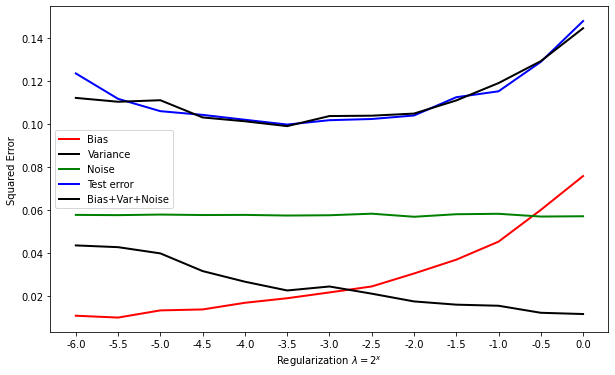

In [23]:
plt.figure(figsize=(10,6))
plt.plot(lbias[:Nlambdas],c='r',linewidth=2)
plt.plot(lvariance[:Nlambdas],c='k',linewidth=2)
plt.plot(lnoise[:Nlambdas],c='g',linewidth=2)
plt.plot(ltotal[:Nlambdas],c='b',linewidth=2)
plt.plot(lsum[:Nlambdas],c='k',linewidth=2)

plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"]);
plt.xlabel("Regularization $\lambda=2^x$");
plt.ylabel("Squared Error");
plt.xticks([i for i in range(Nlambdas)],lmbdas);

As you can see from the result of both the cases that increasing number of models and training dataset leads toward better approximation of E[h] (bias) and E[(hD −¯h)2]) (variance).  